In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
from sklearn.datasets import make_circles, make_moons, make_blobs

seed = 42
n_samples = 1500

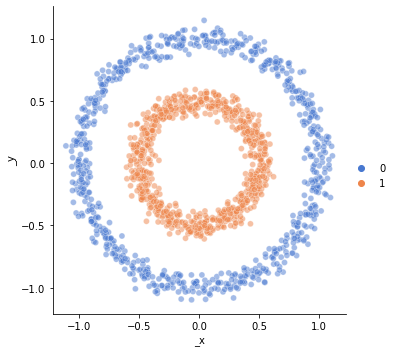

In [2]:
X_circles, y_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=seed)
sns.relplot(x=X_circles[:,0], y=X_circles[:,1], hue=y_circles, alpha=.5, palette="muted");

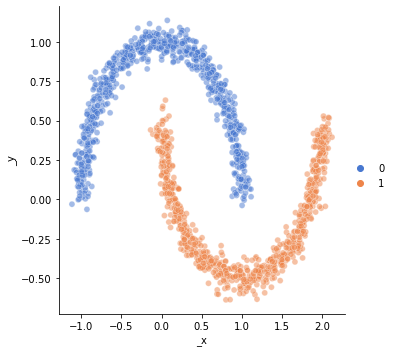

In [3]:
X_moons, y_moons = make_moons(n_samples=n_samples, noise=.05, random_state=seed)
sns.relplot(x=X_moons[:,0], y=X_moons[:,1], hue=y_moons, alpha=.5, palette="muted");

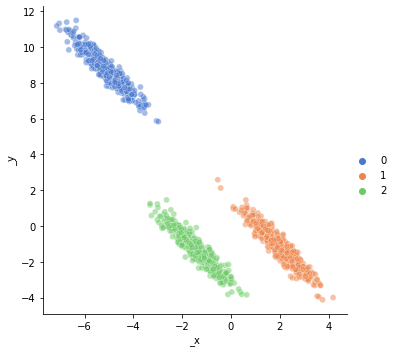

In [4]:
X, y_aniso = make_blobs(n_samples=n_samples, random_state=seed)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
sns.relplot(x=X_aniso[:,0], y=X_aniso[:,1], hue=y_aniso, alpha=.5, palette="muted");

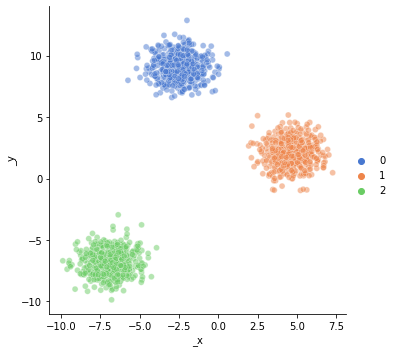

In [5]:
X_blobs, y_blobs = make_blobs(n_samples=n_samples, random_state=seed)
sns.relplot(x=X_blobs[:,0], y=X_blobs[:,1], hue=y_blobs, alpha=.5, palette="muted");

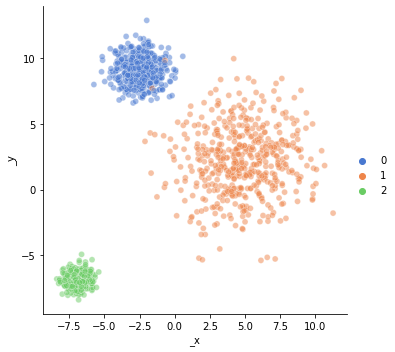

In [6]:
X_varied_blobs, y_varied_blobs = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=seed)
sns.relplot(x=X_varied_blobs[:,0], y=X_varied_blobs[:,1], hue=y_varied_blobs, alpha=.5, palette="muted");

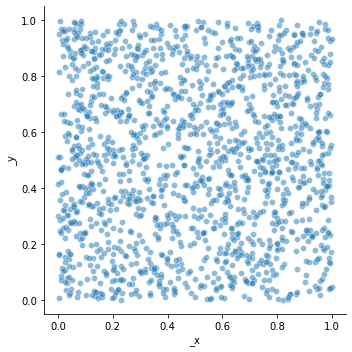

In [14]:
np.random.seed(seed)
X_no_structure, y_no_structure = np.random.rand(n_samples, 2), None
sns.relplot(x=X_no_structure[:,0], y=X_no_structure[:,1], hue=y_no_structure, alpha=.5, palette="muted");